**PROYECTO INTELIGENCIA ARTIFICIAL GRUPO #6**

INTEGRANTES:

1.  MARIA CORDOVA
2.   GIMGER FERNANDEZ
3.   EDGAR PIN
4.   NELSON RODRIGUEZ





**IMPORTACION DE LIBRERIAS**

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

**CONEXION**

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**LECTURA DEL DATASET INDICADORES 2019**

In [61]:
datos_2019 = pd.read_excel('/content/drive/My Drive/proyecto/indicadores2019_cia.xlsx')

**ANALISIS EXPLORATORIO**

In [62]:
datos_2019

,AÑO,EXPEDIENTE,NOMBRE,RAMA,DESCRIPCIÓN RAMA,RAMA 6 DÍGITOS,SUBRAMA 2 DÍGITOS,LIQUIDEZ CORRIENTE,PRUEBA ÁCIDA,ENDEUDAMIENTO DEL ACTIVO,...,IMPACTO DE LA CARGA FINANCIERA,RENTABILIDAD NETA DEL ACTIVO,MARGEN BRUTO,MARGEN OPERACIONAL,RENTABILIDAD NETA DE VENTAS,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABLIDAD FINANCIERA,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,ROE,ROA
0,2019,1,ACEITES TROPICALES SOCIEDAD ANONIMA ATSA,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0126.01,A01,4.596422,3.431308,0.033141,...,0.000686,0.011674,0.970512,0.690534,0.112763,0.073942,0.012075,0.071492,0.012075,0.011674
1,2019,2,ACERIA DEL ECUADOR CA ADELCA.,C,INDUSTRIAS MANUFACTURERAS.,C2410.25,C24,1.893063,0.778696,0.540985,...,0.054990,0.013612,0.175565,0.077136,0.020263,0.112893,0.029656,0.051820,0.029656,0.013612
2,2019,3,ACERO COMERCIAL ECUATORIANO S.A.,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4659.99,G46,5.831770,2.356386,0.641227,...,0.007930,-0.016565,0.326322,-0.030833,-0.015524,-0.091704,-0.046171,-0.032901,-0.046171,-0.016565
3,2019,11,AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA,H,TRANSPORTE Y ALMACENAMIENTO.,H5110.01,H51,0.038086,0.038086,0.783258,...,0.026635,0.140248,1.000000,0.919185,0.699481,0.850316,0.647073,0.184299,0.647073,0.140248
4,2019,22,AGENCIAS Y REPRESENTACIONES CORDOVEZ SA,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4630.95,G46,1.581688,0.856950,0.720654,...,0.012129,0.016383,0.106951,0.033751,0.015335,0.129077,0.058648,0.036057,0.058648,0.016383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85788,2019,734948,CONSORCIO AURORA TRANSPORTE PUBLICO GYE,H,TRANSPORTE Y ALMACENAMIENTO.,H5221.02,H52,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85789,2019,735411,ECUADORIANTRANSACTION S.A.,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4690.00,G46,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85790,2019,735499,GETS TECNOLOGÃA MEDICA GETSMEDICAL S.A.,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4610.09,G46,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000
85791,2019,736127,LASEG CIA.LTDA.,P,ENSEÃ‘ANZA.,P8549.93,P85,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


INDICAMOS LA RAMA A TRABAJAR EN ESTE CASO TOMAREMOS COMO REFERENCIA LA RAMA DE LA AGRICULTURA GANADERIA

In [63]:
du= datos_2019[(datos_2019.RAMA =="A")]

In [64]:
du.fillna(0)
du.dropna(inplace=True)
du

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,AÑO,EXPEDIENTE,NOMBRE,RAMA,DESCRIPCIÓN RAMA,RAMA 6 DÍGITOS,SUBRAMA 2 DÍGITOS,LIQUIDEZ CORRIENTE,PRUEBA ÁCIDA,ENDEUDAMIENTO DEL ACTIVO,...,IMPACTO DE LA CARGA FINANCIERA,RENTABILIDAD NETA DEL ACTIVO,MARGEN BRUTO,MARGEN OPERACIONAL,RENTABILIDAD NETA DE VENTAS,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABLIDAD FINANCIERA,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,ROE,ROA
29,2019,258,COMPANIA ECUATORIANA DEL TE CA CETCA,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0127.09,A01,1.943430,0.959651,0.540487,...,0.014767,0.107535,0.874233,0.600831,0.110454,1.272980,0.234019,0.584950,0.234019,0.107535
75,2019,620,INCUBADORA NACIONAL CA INCA,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0146.01,A01,2.452399,2.336028,0.272941,...,0.000079,0.065860,0.250826,0.161301,0.031100,0.469808,0.090584,0.341578,0.090584,0.065860
97,2019,762,LA VINA CIA LTDA,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0119.03,A01,39.975285,39.975285,0.001096,...,0.000458,-0.001183,0.484385,-0.058766,-0.059696,-0.001166,-0.001185,-0.001165,-0.001185,-0.001183
184,2019,1324,TEXTILES TEXSA SA,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0116.05,A01,34.262527,26.156141,0.079644,...,0.002044,0.023201,0.578137,0.429918,0.053528,0.202467,0.025209,0.186342,0.025209,0.023201
188,2019,1342,PIRETRO LATINOAMERICANO CA PIRELA,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0128.03,A01,0.728577,0.677337,0.428310,...,0.001664,0.006224,0.883319,0.763343,0.009275,0.896037,0.010888,0.512255,0.010888,0.006224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82834,2019,723649,LANFLOWERS S.A.,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0119.03,A01,0.955308,0.894077,1.038903,...,0.000438,-0.053929,0.275378,-0.024044,-0.023413,-1.423590,-1.386262,-0.055381,-1.386262,-0.053929
82855,2019,723681,LUA CACAO Y CHOCOLATE LUATE CIA.LTDA.,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0127.02,A01,2.285701,1.271027,0.822187,...,0.010146,-0.842596,0.749530,-2.384900,-2.395046,-4.718581,-4.738656,-0.839026,-4.738655,-0.842596
83493,2019,724476,CAMARONERA SAFANDO CAMSAFA S.A.,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0321.02,A03,1.011221,1.011221,0.981992,...,0.000974,0.001368,0.762521,0.167296,0.000585,21.726015,0.075985,0.391230,0.075985,0.001368
83927,2019,725017,AROMAS NATIVOS DEL ECUADOR ANESA NATIVAROMAS S.A.,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0150.00,A01,1.334564,1.318590,0.831948,...,0.037629,-0.033209,0.400721,0.231119,-0.458346,0.099645,-0.197612,0.016745,-0.197612,-0.033209


**LIMPIEZA DE DATOS**

In [65]:
du.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1565 entries, 29 to 84841
Data columns (total 37 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   AÑO                                      1565 non-null   int64  
 1   EXPEDIENTE                               1565 non-null   int64  
 2   NOMBRE                                   1565 non-null   object 
 3   RAMA                                     1565 non-null   object 
 4   DESCRIPCIÓN RAMA                         1565 non-null   object 
 5   RAMA 6 DÍGITOS                           1565 non-null   object 
 6   SUBRAMA 2 DÍGITOS                        1565 non-null   object 
 7   LIQUIDEZ CORRIENTE                       1565 non-null   float64
 8   PRUEBA ÁCIDA                             1565 non-null   float64
 9   ENDEUDAMIENTO DEL ACTIVO                 1565 non-null   float64
 10  ENDEUDAMIENTO PATRIMONIAL                1565 

In [66]:
du.isnull().any()

AÑO                                        False
EXPEDIENTE                                 False
NOMBRE                                     False
RAMA                                       False
DESCRIPCIÓN RAMA                           False
RAMA 6 DÍGITOS                             False
SUBRAMA 2 DÍGITOS                          False
LIQUIDEZ CORRIENTE                         False
PRUEBA ÁCIDA                               False
ENDEUDAMIENTO DEL ACTIVO                   False
ENDEUDAMIENTO PATRIMONIAL                  False
ENDEUDAMIENTO A CORTO PLAZO                False
ENDEUDAMIENTO A LARGO PLAZO                False
COBERTURA DE INTERESES                     False
ENDEUDAMIENTO DEL ACTIVO FIJO              False
APALANCAMIENTO                             False
APALANCAMIENTO FINANCIERO                  False
FORTALEZA PATRIMONIAL                      False
ENDEUDAMIENTO PATRIMONIAL CORRIENTE        False
ENDEUDAMIENTO PATRIMONIAL NO CORRIENTE     False
APALANCAMIENTO A COR

In [67]:
data=du.drop(columns = ["AÑO"])

In [68]:
data

,EXPEDIENTE,NOMBRE,RAMA,DESCRIPCIÓN RAMA,RAMA 6 DÍGITOS,SUBRAMA 2 DÍGITOS,LIQUIDEZ CORRIENTE,PRUEBA ÁCIDA,ENDEUDAMIENTO DEL ACTIVO,ENDEUDAMIENTO PATRIMONIAL,...,IMPACTO DE LA CARGA FINANCIERA,RENTABILIDAD NETA DEL ACTIVO,MARGEN BRUTO,MARGEN OPERACIONAL,RENTABILIDAD NETA DE VENTAS,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABLIDAD FINANCIERA,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,ROE,ROA
29,258,COMPANIA ECUATORIANA DEL TE CA CETCA,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0127.09,A01,1.943430,0.959651,0.540487,1.176219,...,0.014767,0.107535,0.874233,0.600831,0.110454,1.272980,0.234019,0.584950,0.234019,0.107535
75,620,INCUBADORA NACIONAL CA INCA,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0146.01,A01,2.452399,2.336028,0.272941,0.375404,...,0.000079,0.065860,0.250826,0.161301,0.031100,0.469808,0.090584,0.341578,0.090584,0.065860
97,762,LA VINA CIA LTDA,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0119.03,A01,39.975285,39.975285,0.001096,0.001097,...,0.000458,-0.001183,0.484385,-0.058766,-0.059696,-0.001166,-0.001185,-0.001165,-0.001185,-0.001183
184,1324,TEXTILES TEXSA SA,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0116.05,A01,34.262527,26.156141,0.079644,0.086536,...,0.002044,0.023201,0.578137,0.429918,0.053528,0.202467,0.025209,0.186342,0.025209,0.023201
188,1342,PIRETRO LATINOAMERICANO CA PIRELA,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0128.03,A01,0.728577,0.677337,0.428310,0.749199,...,0.001664,0.006224,0.883319,0.763343,0.009275,0.896037,0.010888,0.512255,0.010888,0.006224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82834,723649,LANFLOWERS S.A.,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0119.03,A01,0.955308,0.894077,1.038903,26.705166,...,0.000438,-0.053929,0.275378,-0.024044,-0.023413,-1.423590,-1.386262,-0.055381,-1.386262,-0.053929
82855,723681,LUA CACAO Y CHOCOLATE LUATE CIA.LTDA.,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0127.02,A01,2.285701,1.271027,0.822187,4.623879,...,0.010146,-0.842596,0.749530,-2.384900,-2.395046,-4.718581,-4.738656,-0.839026,-4.738655,-0.842596
83493,724476,CAMARONERA SAFANDO CAMSAFA S.A.,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0321.02,A03,1.011221,1.011221,0.981992,54.532516,...,0.000974,0.001368,0.762521,0.167296,0.000585,21.726015,0.075985,0.391230,0.075985,0.001368
83927,725017,AROMAS NATIVOS DEL ECUADOR ANESA NATIVAROMAS S.A.,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0150.00,A01,1.334564,1.318590,0.831948,4.950556,...,0.037629,-0.033209,0.400721,0.231119,-0.458346,0.099645,-0.197612,0.016745,-0.197612,-0.033209


**MAPA DE CALOR DE LAS CORRELACIONES EN BASE A ROA**

In [69]:
corr = data.set_index('ROA').corr()
corr.style.background_gradient(cmap ='coolwarm')


,EXPEDIENTE,LIQUIDEZ CORRIENTE,PRUEBA ÁCIDA,ENDEUDAMIENTO DEL ACTIVO,ENDEUDAMIENTO PATRIMONIAL,ENDEUDAMIENTO A CORTO PLAZO,ENDEUDAMIENTO A LARGO PLAZO,COBERTURA DE INTERESES,ENDEUDAMIENTO DEL ACTIVO FIJO,APALANCAMIENTO,APALANCAMIENTO FINANCIERO,FORTALEZA PATRIMONIAL,ENDEUDAMIENTO PATRIMONIAL CORRIENTE,ENDEUDAMIENTO PATRIMONIAL NO CORRIENTE,APALANCAMIENTO A CORTO Y LARGO PLAZO,ROTACIÓN DE CARTERA,ROTACIÓN DE ACTIVO FIJO,ROTACIÓN DE VENTAS,PERIODO MEDIO DE COBRANZA CORTO PLAZO,PERIODO MEDIO DE PAGO CORTO PLAZO,IMPACTO GASTOS ADMINISTRACIÓN Y VENTAS,IMPACTO DE LA CARGA FINANCIERA,RENTABILIDAD NETA DEL ACTIVO,MARGEN BRUTO,MARGEN OPERACIONAL,RENTABILIDAD NETA DE VENTAS,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABLIDAD FINANCIERA,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,ROE
EXPEDIENTE,1.000000,-0.023753,-0.022061,0.263909,0.042671,0.052286,-0.052286,0.015624,-0.015886,0.042009,0.020176,-0.021766,0.109842,0.027961,0.057781,-0.014610,-0.014046,0.123411,-0.004155,-0.030784,0.011484,0.055386,-0.061971,-0.003117,-0.009136,-0.036277,0.046006,0.016647,-0.005231,0.016647
LIQUIDEZ CORRIENTE,-0.023753,1.000000,0.998908,-0.041646,0.004424,-0.080536,0.080536,0.000412,0.001116,0.004461,-0.006620,-0.000967,-0.010804,0.011800,0.007050,-0.001503,-0.001226,-0.019228,0.000824,-0.002184,-0.001012,-0.003387,0.001172,0.000943,0.000998,0.002013,-0.005072,0.001809,-0.020618,0.001809
PRUEBA ÁCIDA,-0.022061,0.998908,1.000000,-0.039391,0.003615,-0.072802,0.072802,0.000276,0.001034,0.003648,-0.000606,-0.002011,-0.009598,0.011918,0.007519,-0.001699,-0.001271,-0.018289,0.001052,-0.001842,-0.000799,-0.002918,0.000631,0.000802,0.000804,0.001689,-0.003066,0.001496,-0.018791,0.001496
ENDEUDAMIENTO DEL ACTIVO,0.263909,-0.041646,-0.039391,1.000000,0.105755,-0.093629,0.093629,0.012688,0.004011,0.103946,-0.000482,0.032855,0.155289,0.068240,0.106813,-0.011809,0.007557,0.126516,0.020098,0.010511,0.070278,0.144522,-0.531215,-0.026533,-0.058056,-0.143178,0.075942,-0.026857,0.024550,-0.026857
ENDEUDAMIENTO PATRIMONIAL,0.042671,0.004424,0.003615,0.105755,1.000000,-0.089750,0.089750,0.002783,-0.003592,0.999994,0.021640,0.634752,0.643152,0.834794,0.925606,0.003381,0.003228,-0.019411,0.004322,-0.004361,0.004917,0.045730,-0.035427,-0.002266,-0.004180,-0.005919,0.364625,-0.647977,-0.022705,-0.647977
ENDEUDAMIENTO A CORTO PLAZO,0.052286,-0.080536,-0.072802,-0.093629,-0.089750,1.000000,-1.000000,-0.001220,0.030476,-0.089849,0.030718,-0.034799,0.093267,-0.141441,-0.095495,-0.004313,0.032416,0.213250,-0.024527,0.038977,-0.034802,-0.211089,0.075907,0.009812,0.027792,0.042734,0.036676,0.027985,0.122588,0.027985
ENDEUDAMIENTO A LARGO PLAZO,-0.052286,0.080536,0.072802,0.093629,0.089750,-1.000000,1.000000,0.001220,-0.030476,0.089849,-0.030718,0.034799,-0.093267,0.141441,0.095495,0.004313,-0.032416,-0.213250,0.024527,-0.038977,0.034802,0.211089,-0.075907,-0.009812,-0.027792,-0.042734,-0.036676,-0.027985,-0.122588,-0.027985
COBERTURA DE INTERESES,0.015624,0.000412,0.000276,0.012688,0.002783,-0.001220,0.001220,1.000000,0.000334,0.002770,0.001810,0.000386,0.006217,0.001357,0.003073,0.006341,0.000369,-0.000289,-0.000366,0.000824,-0.000517,0.002640,0.010918,0.002271,0.001025,0.000672,0.004278,0.000138,0.021058,0.000138
ENDEUDAMIENTO DEL ACTIVO FIJO,-0.015886,0.001116,0.001034,0.004011,-0.003592,0.030476,-0.030476,0.000334,1.000000,-0.003570,-0.000025,-0.001161,-0.004728,-0.002622,-0.003729,-0.002092,0.998275,-0.000121,-0.000792,-0.001299,-0.001118,-0.005669,-0.000351,-0.000583,0.000635,0.001322,-0.002892,0.000889,-0.006525,0.000889
APALANCAMIENTO,0.042009,0.004461,0.003648,0.103946,0.999994,-0.089849,0.089849,0.002770,-0.003570,1.000000,0.021626,0.634804,0.642927,0.834819,0.925559,0.003437,0.003248,-0.019678,0.004336,-0.004331,0.004832,0.045491,-0.034090,-0.002277,-0.004122,-0.005671,0.364531,-0.647992,-0.022660,-0.647992


In [70]:
data.describe()

,EXPEDIENTE,LIQUIDEZ CORRIENTE,PRUEBA ÁCIDA,ENDEUDAMIENTO DEL ACTIVO,ENDEUDAMIENTO PATRIMONIAL,ENDEUDAMIENTO A CORTO PLAZO,ENDEUDAMIENTO A LARGO PLAZO,COBERTURA DE INTERESES,ENDEUDAMIENTO DEL ACTIVO FIJO,APALANCAMIENTO,...,IMPACTO DE LA CARGA FINANCIERA,RENTABILIDAD NETA DEL ACTIVO,MARGEN BRUTO,MARGEN OPERACIONAL,RENTABILIDAD NETA DE VENTAS,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABLIDAD FINANCIERA,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,ROE,ROA
count,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1.565000e+03,1565.000000,1565.000000,...,1.565000e+03,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000
mean,212651.573163,3.611597,3.158438,0.695185,19.091569,0.657878,0.342122,-3.073684e+02,42.312012,19.971441,...,2.538602e-02,0.007505,0.375662,-0.183062,-0.218967,5.748818,-0.761790,0.386539,-0.761790,0.007505
std,231486.688668,54.459652,54.359693,0.369955,135.514520,0.307271,0.307271,3.208230e+04,1378.685576,135.509190,...,9.001953e-02,0.197478,4.172647,14.495907,4.873870,50.154223,27.654710,0.642273,27.654710,0.197478
min,258.000000,0.003140,0.003140,0.001096,0.001097,0.000119,0.000000,-1.255988e+06,-0.202981,0.224578,...,1.428459e-08,-4.439310,-163.774380,-566.499820,-172.336490,-422.399750,-1062.466900,-7.092859,-1062.466900,-4.439311
25%,63075.000000,0.732460,0.532882,0.493342,0.973716,0.403596,0.027888,6.444498e+00,0.372262,1.926667,...,9.950692e-04,-0.002365,0.287693,0.075884,-0.002846,0.291630,-0.006508,0.088777,-0.006508,-0.002365
50%,129195.000000,1.121257,0.898475,0.712236,2.415759,0.714228,0.285772,3.286481e+01,0.816590,3.318814,...,4.415414e-03,0.013633,0.474491,0.280166,0.011318,0.940459,0.051819,0.260320,0.051819,0.013633
75%,181689.000000,1.859574,1.557522,0.892908,6.722759,0.972112,0.596404,1.992379e+02,1.651820,7.556287,...,1.901980e-02,0.051822,0.718152,0.479968,0.038024,2.356143,0.223619,0.520757,0.223619,0.051822
max,726214.000000,2145.126000,2145.126000,5.452787,3270.168000,1.000000,0.999881,1.178499e+05,54501.410000,3271.168000,...,2.258329e+00,0.611000,2.108578,1.690159,0.660617,1519.058000,118.633700,12.323102,118.633680,0.611000


In [71]:
data.columns

Index(['EXPEDIENTE', 'NOMBRE', 'RAMA', 'DESCRIPCIÓN RAMA', 'RAMA 6 DÍGITOS',
       'SUBRAMA 2 DÍGITOS', 'LIQUIDEZ CORRIENTE', 'PRUEBA ÁCIDA',
       'ENDEUDAMIENTO DEL ACTIVO', 'ENDEUDAMIENTO PATRIMONIAL',
       'ENDEUDAMIENTO A CORTO PLAZO', 'ENDEUDAMIENTO A LARGO PLAZO',
       'COBERTURA DE INTERESES', 'ENDEUDAMIENTO DEL ACTIVO FIJO',
       'APALANCAMIENTO', 'APALANCAMIENTO FINANCIERO', 'FORTALEZA PATRIMONIAL',
       'ENDEUDAMIENTO PATRIMONIAL CORRIENTE',
       'ENDEUDAMIENTO PATRIMONIAL NO CORRIENTE',
       'APALANCAMIENTO A CORTO Y LARGO PLAZO', 'ROTACIÓN DE CARTERA',
       'ROTACIÓN DE ACTIVO FIJO', 'ROTACIÓN DE VENTAS',
       'PERIODO MEDIO DE COBRANZA CORTO PLAZO',
       'PERIODO MEDIO DE PAGO CORTO PLAZO',
       'IMPACTO GASTOS ADMINISTRACIÓN Y VENTAS',
       'IMPACTO DE LA CARGA FINANCIERA', 'RENTABILIDAD NETA DEL ACTIVO',
       'MARGEN BRUTO', 'MARGEN OPERACIONAL', 'RENTABILIDAD NETA DE VENTAS',
       'RENTABILIDAD OPERACIONAL DEL PATRIMONIO', 'RENTABLIDAD FINAN

In [72]:
len(du)

1565

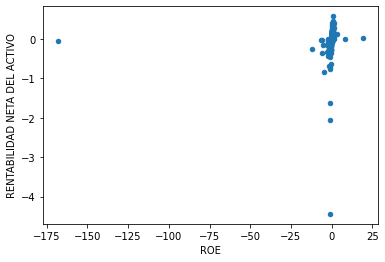

In [121]:
data[data['ROE']<500].sample(600).plot.scatter(x='ROE', y='RENTABILIDAD NETA DEL ACTIVO')


<ipython-input-135-7169fe6bf98d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  valor_por_salario = data.groupby("RAMA")["RENTABILIDAD NETA DE VENTAS","ROA"].max()


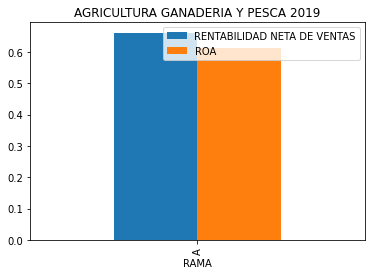

In [135]:
valor_por_salario = data.groupby("RAMA")["RENTABILIDAD NETA DE VENTAS","ROA"].max()
valor_por_salario.plot.bar()
plt.title("AGRICULTURA GANADERIA Y PESCA 2019")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5edb1f4eb0>,
      dtype=object)

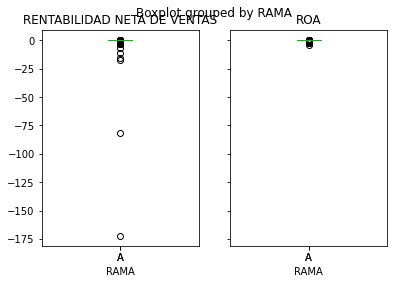

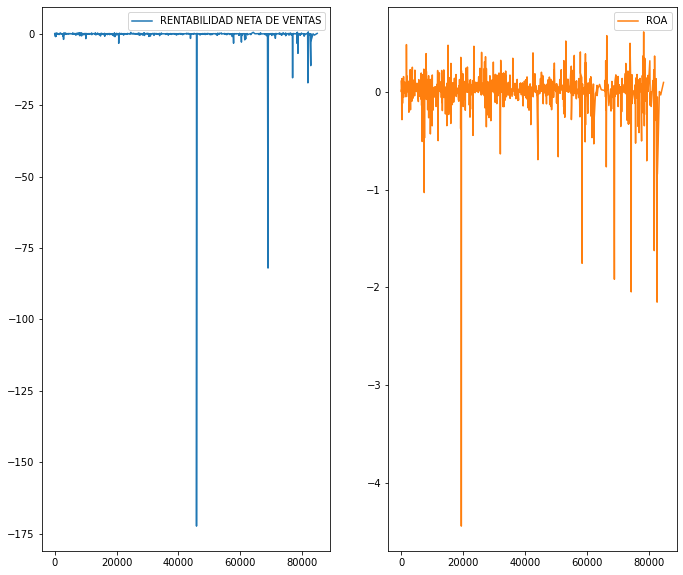

In [136]:
du.boxplot(by ='RAMA', column=['RENTABILIDAD NETA DE VENTAS','ROA'], grid = False,)
du[['RENTABILIDAD NETA DE VENTAS','ROA']].plot(subplots=True, layout=(-1,5), figsize=(30,10) )

**MODELO PREDICTIVO LINEAL**

In [77]:
data.describe()

,EXPEDIENTE,LIQUIDEZ CORRIENTE,PRUEBA ÁCIDA,ENDEUDAMIENTO DEL ACTIVO,ENDEUDAMIENTO PATRIMONIAL,ENDEUDAMIENTO A CORTO PLAZO,ENDEUDAMIENTO A LARGO PLAZO,COBERTURA DE INTERESES,ENDEUDAMIENTO DEL ACTIVO FIJO,APALANCAMIENTO,...,IMPACTO DE LA CARGA FINANCIERA,RENTABILIDAD NETA DEL ACTIVO,MARGEN BRUTO,MARGEN OPERACIONAL,RENTABILIDAD NETA DE VENTAS,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABLIDAD FINANCIERA,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,ROE,ROA
count,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1.565000e+03,1565.000000,1565.000000,...,1.565000e+03,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000
mean,212651.573163,3.611597,3.158438,0.695185,19.091569,0.657878,0.342122,-3.073684e+02,42.312012,19.971441,...,2.538602e-02,0.007505,0.375662,-0.183062,-0.218967,5.748818,-0.761790,0.386539,-0.761790,0.007505
std,231486.688668,54.459652,54.359693,0.369955,135.514520,0.307271,0.307271,3.208230e+04,1378.685576,135.509190,...,9.001953e-02,0.197478,4.172647,14.495907,4.873870,50.154223,27.654710,0.642273,27.654710,0.197478
min,258.000000,0.003140,0.003140,0.001096,0.001097,0.000119,0.000000,-1.255988e+06,-0.202981,0.224578,...,1.428459e-08,-4.439310,-163.774380,-566.499820,-172.336490,-422.399750,-1062.466900,-7.092859,-1062.466900,-4.439311
25%,63075.000000,0.732460,0.532882,0.493342,0.973716,0.403596,0.027888,6.444498e+00,0.372262,1.926667,...,9.950692e-04,-0.002365,0.287693,0.075884,-0.002846,0.291630,-0.006508,0.088777,-0.006508,-0.002365
50%,129195.000000,1.121257,0.898475,0.712236,2.415759,0.714228,0.285772,3.286481e+01,0.816590,3.318814,...,4.415414e-03,0.013633,0.474491,0.280166,0.011318,0.940459,0.051819,0.260320,0.051819,0.013633
75%,181689.000000,1.859574,1.557522,0.892908,6.722759,0.972112,0.596404,1.992379e+02,1.651820,7.556287,...,1.901980e-02,0.051822,0.718152,0.479968,0.038024,2.356143,0.223619,0.520757,0.223619,0.051822
max,726214.000000,2145.126000,2145.126000,5.452787,3270.168000,1.000000,0.999881,1.178499e+05,54501.410000,3271.168000,...,2.258329e+00,0.611000,2.108578,1.690159,0.660617,1519.058000,118.633700,12.323102,118.633680,0.611000


In [78]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

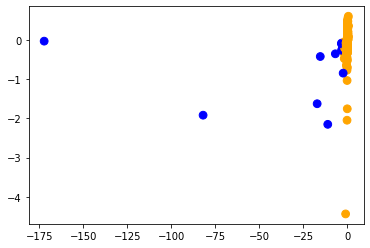

In [151]:

# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = data[(data['RENTABILIDAD NETA DE VENTAS'] <=3) & (data['ROA'] < 3)]
 
colores=['orange','blue']
tamanios=[60,60]
 
f1 = filtered_data['RENTABILIDAD NETA DE VENTAS'].values
f2 = filtered_data['ROA'].values
 
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['RENTABILIDAD NETA DE VENTAS']>=-2):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [152]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["RENTABILIDAD OPERACIONAL DEL PATRIMONIO"]]
X_train = np.array(dataX)
y_train = filtered_data['LIQUIDEZ CORRIENTE'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [-0.00550695]
Independent term: 
 3.643255931916952
Mean squared error: 2963.88
Variance score: 0.00


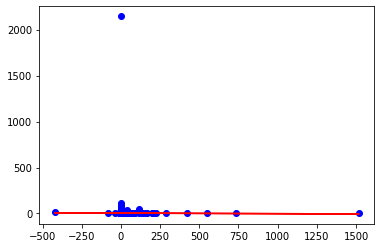

In [153]:
y_pred = regr.predict(X_train) 
plt.scatter(X_train,y_train,color='b')
plt.plot(X_train, y_pred,color='r')
plt.show()

In [154]:
import torch
from torch import nn
from torch.nn import functional as F
import torch.utils.data as Data
from torch import optim
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import tqdm

In [155]:
D1= data[['RENTABILIDAD NETA DE VENTAS','ROA']]

In [157]:
D2=data[['ROE']]

In [158]:
X = D1.values
y = D2.values

X_train, X_test, y_train, y_test =  train_test_split(X,y, random_state=1)

In [159]:
print(X.shape)
print(y.shape)

(1565, 2)
(1565, 1)


In [160]:
class DataMaker(Data.Dataset):
  def __init__(self, X, y):
    #scaler = StandardScaler()
    scaler = MinMaxScaler()
    self.targets = scaler.fit_transform(X.astype(np.float32))
    self.labels = y.astype(np.float32)

  def __getitem__(self, index):
    return self.targets[index, :], self.labels[index]

  def __len__(self):
    return len(self.targets)

In [161]:
class MLP(nn.Module):
  def __init__(self, n_features, hiddenA, hiddenB):
    super().__init__()

    self.linearA = nn.Linear(n_features, hiddenA)
    self.linearB = nn.Linear(hiddenA, hiddenB)
    self.linearC = nn.Linear(hiddenB, 1)

  def forward(self, x):
    yA = F.relu(self.linearA(x))
    yB = F.relu(self.linearB(yA))
    return self.linearC(yB)

In [162]:
torch.manual_seed(1)

In [163]:
train_set = DataMaker(X_train, y_train)
test_set = DataMaker(X_test, y_test)

In [164]:
bs = 25
n_samples , n_features = X.shape
train_loader = Data.DataLoader(train_set, batch_size=bs, shuffle=True)
test_loader = Data.DataLoader(test_set, batch_size=bs, shuffle=True)

In [165]:
model = MLP(n_features,100,50)

In [166]:
criterion = nn.MSELoss(size_average=False)
optimizer = optim.Adam(model.parameters(),lr=0.01)

/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [ ]:
n_epochs = 100
all_losses = []
for epoch in range(n_epochs):
    progress_bar = tqdm.notebook.tqdm(train_loader, leave=False)
    losses = []
    total = 0
    for inputs, target in progress_bar:
        optimizer.zero_grad()
        y_pred = model(inputs)
        loss = criterion(y_pred, torch.unsqueeze(target,dim=1))

        loss.backward()
        
        optimizer.step()
        
        progress_bar.set_description(f'Loss: {loss.item():.3f}')
        
        losses.append(loss.item())
        total += 1

    epoch_loss = sum(losses) / total
    all_losses.append(epoch_loss)
                
    mess = f"Epoch #{epoch+1}\tLoss: {all_losses[-1]:.3f}"
    tqdm.tqdm.write(mess)

  0%|          | 0/47 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([25, 1, 1])) that is different to the input size (torch.Size([25, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([23, 1, 1])) that is different to the input size (torch.Size([23, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch #1	Loss: 28516.329


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #2	Loss: 27449.047


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #3	Loss: 28582.948


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #4	Loss: 28596.926


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #5	Loss: 28587.307


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #6	Loss: 28647.000


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #7	Loss: 28553.039


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #8	Loss: 28586.610


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #9	Loss: 28552.749


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #10	Loss: 28618.908


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #11	Loss: 28588.503


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #12	Loss: 28584.200


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #13	Loss: 28598.852


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #14	Loss: 28584.123


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #15	Loss: 28578.428


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #16	Loss: 28584.214


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #17	Loss: 28581.757


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #18	Loss: 27862.179


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #19	Loss: 28579.420


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #20	Loss: 28582.000


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #21	Loss: 28580.298


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #22	Loss: 28581.422


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #23	Loss: 28582.912


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #24	Loss: 28581.470


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #25	Loss: 27873.903


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #26	Loss: 28583.687


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #27	Loss: 28587.136


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #28	Loss: 28578.733


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #29	Loss: 28585.375


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #30	Loss: 27864.900


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #31	Loss: 28585.124


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #32	Loss: 28585.713


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #33	Loss: 28577.692


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #34	Loss: 28579.376


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #35	Loss: 28579.458


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #36	Loss: 28581.796


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #37	Loss: 28581.475


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #38	Loss: 28579.399


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #39	Loss: 28579.390


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #40	Loss: 28581.291


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #41	Loss: 28580.117


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #42	Loss: 28579.243


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #43	Loss: 28579.753


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #44	Loss: 28578.990


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #45	Loss: 28578.792


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #46	Loss: 28465.312


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #47	Loss: 28578.606


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #48	Loss: 28588.929


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #49	Loss: 28578.826


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #50	Loss: 28577.594


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #51	Loss: 28579.735


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #52	Loss: 28579.762


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #53	Loss: 28580.724


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #54	Loss: 28572.372


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #55	Loss: 28580.495


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #56	Loss: 28580.813


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #57	Loss: 28581.828


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #58	Loss: 28579.981


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #59	Loss: 28579.872


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #60	Loss: 28572.501


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #61	Loss: 28582.149


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #62	Loss: 27865.998


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #63	Loss: 28464.703


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #64	Loss: 28582.476


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #65	Loss: 28573.923


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #66	Loss: 28586.925


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #67	Loss: 28608.114


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #68	Loss: 28452.880


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #69	Loss: 28633.480


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #70	Loss: 28617.402


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #71	Loss: 28583.221


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #72	Loss: 28474.216


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #73	Loss: 28588.432


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #74	Loss: 28581.629


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #75	Loss: 28585.475


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #76	Loss: 28588.938


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #77	Loss: 28593.259


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #78	Loss: 28596.158


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #79	Loss: 28585.692


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #80	Loss: 28590.655


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #83	Loss: 28584.701


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #84	Loss: 28594.688


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #85	Loss: 28481.955


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #86	Loss: 28462.891


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #87	Loss: 28585.830


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #88	Loss: 28584.509


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch #89	Loss: 28580.961


  0%|          | 0/47 [00:00<?, ?it/s]

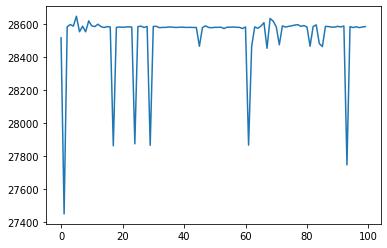

In [168]:
plt.plot(all_losses)

392 392


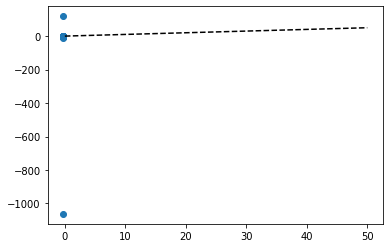

In [169]:
y_pred = []
y_true = []
model.train(False)
for inputs, targets in test_loader:
  y_pred.extend(model(inputs).data.numpy())
  y_true.extend(targets.numpy())

print(len(y_pred),len(y_true))
plt.scatter(x=y_pred, y=y_true)
plt.plot([0,50], [0,50],'--k')

In [170]:
print("MAE:", mean_absolute_error(y_true, y_pred))
print("MSE:", mean_squared_error(y_true, y_pred))
print("R^2:", r2_score(y_true, y_pred))

MAE: 3.5467746
MSE: 2915.4019
R^2: -0.0015956673141215294


**EVALUANDO MODELO 2019**

In [247]:
dfs_rg_l = data[['ROE','RENTABILIDAD OPERACIONAL DEL PATRIMONIO', 'RENTABILIDAD NETA DE VENTAS']]
#Remover Outliers

dfs_rg_l

,ROE,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABILIDAD NETA DE VENTAS
29,0.234019,1.272980,0.110454
75,0.090584,0.469808,0.031100
97,-0.001185,-0.001166,-0.059696
184,0.025209,0.202467,0.053528
188,0.010888,0.896037,0.009275
...,...,...,...
82834,-1.386262,-1.423590,-0.023413
82855,-4.738655,-4.718581,-2.395046
83493,0.075985,21.726015,0.000585
83927,-0.197612,0.099645,-0.458346


In [248]:
dfs_Y = dfs_rg_l[['ROE']]
dfs_Y

,ROE
29,0.234019
75,0.090584
97,-0.001185
184,0.025209
188,0.010888
...,...
82834,-1.386262
82855,-4.738655
83493,0.075985
83927,-0.197612


In [249]:
dfs_X = dfs_rg_l[['ROE','RENTABILIDAD OPERACIONAL DEL PATRIMONIO', 'RENTABILIDAD NETA DE VENTAS']]
dfs_X

,ROE,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABILIDAD NETA DE VENTAS
29,0.234019,1.272980,0.110454
75,0.090584,0.469808,0.031100
97,-0.001185,-0.001166,-0.059696
184,0.025209,0.202467,0.053528
188,0.010888,0.896037,0.009275
...,...,...,...
82834,-1.386262,-1.423590,-0.023413
82855,-4.738655,-4.718581,-2.395046
83493,0.075985,21.726015,0.000585
83927,-0.197612,0.099645,-0.458346


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5edb0703a0>,
      dtype=object)

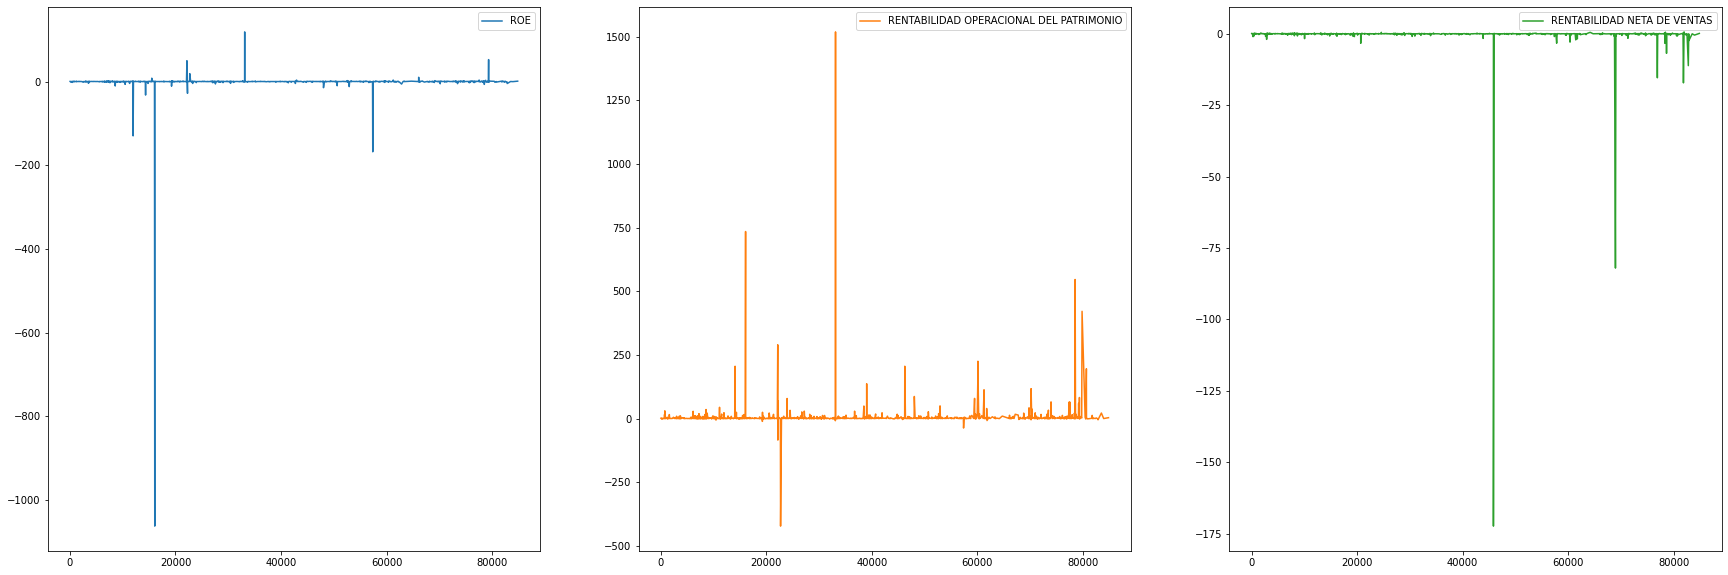

In [251]:
dfs_X.plot(subplots=True, layout=(-1,3), figsize=(30,10) )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e5b778460>,
      dtype=object)

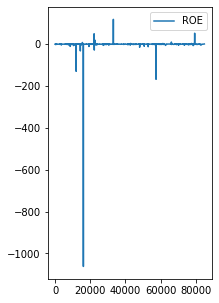

In [252]:
dfs_Y.plot(subplots=True, layout=(-1,3), figsize=(10,5) )


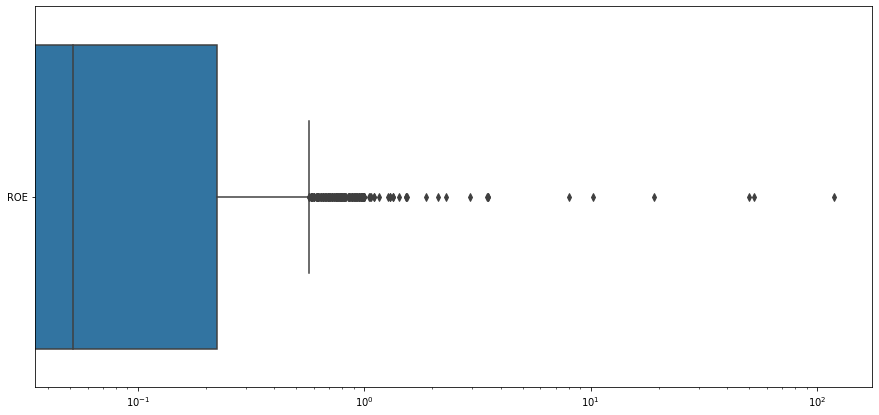

In [253]:
plt.figure(figsize = (15,7))
ax =sns.boxplot(data = dfs_Y, orient="h")
ax.set(xscale="log")
plt.show()

In [255]:
scaler = StandardScaler()
inputs = scaler.fit_transform(dfs_X)
dX = np.array(inputs, dtype='float32')
dY = np.array(dfs_Y, dtype='float32')


In [256]:
dX

array([[ 0.03602017, -0.08927003,  0.06761088],
       [ 0.03083186, -0.10528919,  0.05132422],
       [ 0.02751244, -0.11468271,  0.03268897],
       ...,
       [ 0.03030379,  0.31866318,  0.0450612 ],
       [ 0.02040731, -0.11267205, -0.04913051],
       [ 0.06045087, -0.04528852,  0.07227939]], dtype=float32)

In [257]:
dY

array([[ 0.23401906],
       [ 0.09058373],
       [-0.00118463],
       ...,
       [ 0.07598484],
       [-0.19761197],
       [ 0.90942705]], dtype=float32)

In [258]:
print('tamaño de dX INDICADORES : ',dX.shape) #tamaño de dX INDICADORES
print('tamaño de dY ROE : ',dY.shape) #tamaño de dY ROE

tamaño de dX INDICADORES :  (1565, 3)
tamaño de dY ROE :  (1565, 1)


In [259]:
X = torch.from_numpy(dX)
Y = torch.from_numpy(dY)


In [260]:
from torch.utils.data import TensorDataset
dataset = TensorDataset(X,Y)

In [261]:
dataset[1:2]

(tensor([[ 0.0308, -0.1053,  0.0513]]), tensor([[0.0906]]))

In [262]:
from torch.utils.data import DataLoader
bs=64
train_loader = DataLoader(dataset,batch_size=bs,shuffle=True)

In [265]:
class ModeloRegresionLineal(torch.nn.Module):
 def __init__(self):
  super(ModeloRegresionLineal, self).__init__()
  self.linear = torch.nn.Linear(3,1) #X @ w.t() + b
 def forward(self, x):
  y_pred = self.linear(x)
  return y_pred


In [266]:
epochs = 30
ta = 1e-9 # Tasa Aprendizaje
modelo = ModeloRegresionLineal()
funcion_costo = torch.nn.MSELoss(reduction = 'mean')
optimizer = torch.optim.SGD(modelo.parameters(), lr = ta) #Actualiza los pesos w y el bias b

for i in range(epochs):
  for x,y in train_loader:
   preds = modelo(x)
   loss = funcion_costo(preds, y)
   optimizer.zero_grad()
   loss.backward()
   optimizer.step()

  print(f"Epoch {i}/{epochs}: Loss {loss}")

Epoch 0/30: Loss 3.7705414295196533
Epoch 1/30: Loss 1.0743095874786377
Epoch 2/30: Loss 0.627961277961731
Epoch 3/30: Loss 0.5228757858276367
Epoch 4/30: Loss 0.3778226375579834
Epoch 5/30: Loss 0.5754765272140503
Epoch 6/30: Loss 0.6021027565002441
Epoch 7/30: Loss 568.1649169921875
Epoch 8/30: Loss 0.6125538349151611
Epoch 9/30: Loss 0.6532401442527771
Epoch 10/30: Loss 37.30521774291992
Epoch 11/30: Loss 0.43684738874435425
Epoch 12/30: Loss 0.5169415473937988
Epoch 13/30: Loss 38331.1640625
Epoch 14/30: Loss 0.63414466381073
Epoch 15/30: Loss 0.9429479837417603
Epoch 16/30: Loss 0.6123935580253601
Epoch 17/30: Loss 4.168334007263184
Epoch 18/30: Loss 0.39348939061164856
Epoch 19/30: Loss 0.6212916374206543
Epoch 20/30: Loss 0.5643094182014465
Epoch 21/30: Loss 0.4787541627883911
Epoch 22/30: Loss 0.6774821877479553
Epoch 23/30: Loss 0.5652852654457092
Epoch 24/30: Loss 4.309688568115234
Epoch 25/30: Loss 3.741856098175049
Epoch 26/30: Loss 79.4842300415039
Epoch 27/30: Loss 1.4696

In [267]:
modelo.linear.weight #w

Parameter containing:
tensor([[0.3176, 0.3116, 0.0187]], requires_grad=True)

In [268]:
modelo.linear.bias #b

Parameter containing:
tensor([-0.4816], requires_grad=True)

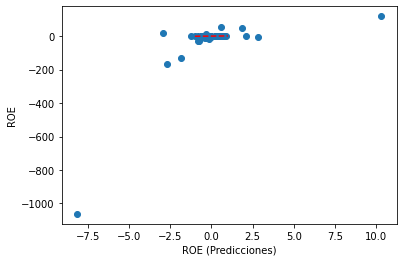


Resultados Del año 2019 datos:
MAE: 1.7818398475646973
MSE: 751.5975952148438
RMSE: 27.415279388427734


In [270]:
# Evaluando el modelo
y_pred = []
y_true = []
modelo.train(False)
for inputs, targets in train_loader:
 y_pred.extend(modelo(inputs).data.numpy())
 y_true.extend(targets.numpy())
plt.scatter(y_pred, y_true)
plt.ylabel('ROE')
plt.xlabel('ROE (Predicciones)')
plt.plot([-1,1], [-1, 1], '--k', c='r')
plt.show()
# Calculando Errores
mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
print(f"\nResultados Del año 2019 datos:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


**EVALUANDO MODELO 2020

**LECTURAS DATASET**

In [244]:
datos_2018 = pd.read_excel('/content/drive/My Drive/proyecto/indicadores2018_cia.xlsx')

In [245]:
datos_2017 = pd.read_excel('/content/drive/My Drive/proyecto/indicadores2017_cia.xlsx')

In [246]:
datos_2020 = pd.read_excel('/content/drive/My Drive/proyecto/indicadores2020_cia.xlsx')

In [271]:
datos_2020.fillna(0)
datos_2020.dropna(inplace=True)
datos_2020

,AÑO,EXPEDIENTE,NOMBRE,RAMA,DESCRIPCIÓN RAMA,RAMA 6 DÍGITOS,SUBRAMA 2 DÍGITOS,LIQUIDEZ CORRIENTE,PRUEBA ÁCIDA,ENDEUDAMIENTO DEL ACTIVO,...,IMPACTO DE LA CARGA FINANCIERA,RENTABILIDAD NETA DEL ACTIVO,MARGEN BRUTO,MARGEN OPERACIONAL,RENTABILIDAD NETA DE VENTAS,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABLIDAD FINANCIERA,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,ROE,ROA
0,2020,1,ACEITES TROPICALES SOCIEDAD ANONIMA ATSA,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0126.01,A01,6.354991,5.418267,0.035874,...,0.000644,0.017183,0.915149,0.645869,0.145618,0.079047,0.017822,0.076211,0.017822,0.017183
2,2020,3,ACERO COMERCIAL ECUATORIANO S.A.,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4659.99,G46,6.851419,2.650851,0.638577,...,0.002155,-0.029101,0.311292,-0.051335,-0.034202,-0.120850,-0.080518,-0.043678,-0.080518,-0.029101
4,2020,22,AGENCIAS Y REPRESENTACIONES CORDOVEZ SA,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4630.95,G46,1.749510,0.996061,0.654503,...,0.019385,0.032398,0.104652,0.059725,0.033429,0.167538,0.093772,0.057884,0.093772,0.032398
7,2020,49,ALMACENES EL GLOBO DE QUITO SA,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4719.00,G47,2.367648,0.527807,0.878926,...,0.030278,-0.119259,0.330159,-0.198803,-0.217195,-0.901599,-0.985009,-0.109160,-0.985009,-0.119259
8,2020,63,CONFITECA C.A.,C,INDUSTRIAS MANUFACTURERAS.,C1073.21,C10,1.864898,1.395899,0.478293,...,0.032907,-0.029846,0.687409,0.245995,-0.044041,0.319549,-0.057209,0.166711,-0.057209,-0.029846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83769,2020,733021,X-DRIVE CIA.LTDA.,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4520.01,G45,0.864709,0.710392,0.976507,...,0.002251,0.002121,0.521048,-0.862590,0.012410,-6.274013,0.090264,-0.147399,0.090264,0.002121
83825,2020,733112,CLINICA VETERINARIA EL PINAR CVEP S.A.S.,M,"ACTIVIDADES PROFESIONALES, CIENTÃFICAS Y TÃ‰C...",M7500.02,M75,0.832497,0.456453,0.981370,...,0.020512,-0.006370,0.861823,0.033124,-0.036434,0.310856,-0.341922,0.005791,-0.341922,-0.006370
83830,2020,733121,PEZVERA S.A.,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4630.33,G46,1.340035,0.643060,0.733170,...,0.000719,0.239990,0.356159,0.327693,0.326974,0.901391,0.899413,0.240518,0.899413,0.239990
83880,2020,733213,CLINITEST S.A.S.,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4649.24,G46,0.343882,0.319129,1.237739,...,0.098463,-0.241192,0.829767,-38.634163,-51.375614,-0.762914,-1.014521,-0.181375,-1.014521,-0.241191


In [272]:
dfs_rg_l = datos_2020[['ROE','RENTABILIDAD OPERACIONAL DEL PATRIMONIO', 'RENTABILIDAD NETA DE VENTAS']]
#Remover Outliers

dfs_rg_l

,ROE,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABILIDAD NETA DE VENTAS
0,0.017822,0.079047,0.145618
2,-0.080518,-0.120850,-0.034202
4,0.093772,0.167538,0.033429
7,-0.985009,-0.901599,-0.217195
8,-0.057209,0.319549,-0.044041
...,...,...,...
83769,0.090264,-6.274013,0.012410
83825,-0.341922,0.310856,-0.036434
83830,0.899413,0.901391,0.326974
83880,-1.014521,-0.762914,-51.375614


In [273]:
dfs_Y = dfs_rg_l[['ROE']]
dfs_Y

,ROE
0,0.017822
2,-0.080518
4,0.093772
7,-0.985009
8,-0.057209
...,...
83769,0.090264
83825,-0.341922
83830,0.899413
83880,-1.014521


In [274]:
dfs_X = dfs_rg_l[['ROE','RENTABILIDAD OPERACIONAL DEL PATRIMONIO', 'RENTABILIDAD NETA DE VENTAS']]
dfs_X

,ROE,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABILIDAD NETA DE VENTAS
0,0.017822,0.079047,0.145618
2,-0.080518,-0.120850,-0.034202
4,0.093772,0.167538,0.033429
7,-0.985009,-0.901599,-0.217195
8,-0.057209,0.319549,-0.044041
...,...,...,...
83769,0.090264,-6.274013,0.012410
83825,-0.341922,0.310856,-0.036434
83830,0.899413,0.901391,0.326974
83880,-1.014521,-0.762914,-51.375614


In [275]:
scaler = StandardScaler()
inputs = scaler.fit_transform(dfs_X)
dX = np.array(inputs, dtype='float32')
dY = np.array(dfs_Y, dtype='float32')

In [276]:
dX

array([[ 0.04036301, -0.03196327,  0.0089452 ],
       [ 0.03204108, -0.03560445,  0.00878947],
       [ 0.04679025, -0.03035139,  0.00884804],
       ...,
       [ 0.11496707, -0.01698408,  0.00910226],
       [-0.04699835, -0.0472998 , -0.03567374],
       [ 0.08404137,  0.87546974,  0.00882611]], dtype=float32)

In [277]:
dY

array([[ 0.01782197],
       [-0.08051773],
       [ 0.09377224],
       ...,
       [ 0.8994128 ],
       [-1.014521  ],
       [ 0.53396606]], dtype=float32)

In [278]:
print('tamaño de dX INDICADORES : ',dX.shape) #tamaño de dX INDICADORES
print('tamaño de dY ROE : ',dY.shape) #tamaño de dY ROE

tamaño de dX INDICADORES :  (14020, 3)
tamaño de dY ROE :  (14020, 1)


In [279]:
X = torch.from_numpy(dX)
Y = torch.from_numpy(dY)


In [280]:
from torch.utils.data import TensorDataset
dataset = TensorDataset(X,Y)

In [281]:
dataset[1:2]

(tensor([[ 0.0320, -0.0356,  0.0088]]), tensor([[-0.0805]]))

In [282]:
from torch.utils.data import DataLoader
bs=64
train_loader = DataLoader(dataset,batch_size=bs,shuffle=True)

In [283]:
class ModeloRegresionLineal(torch.nn.Module):
 def __init__(self):
  super(ModeloRegresionLineal, self).__init__()
  self.linear = torch.nn.Linear(3,1) #X @ w.t() + b
 def forward(self, x):
  y_pred = self.linear(x)
  return y_pred

In [284]:
epochs = 30
ta = 1e-9 # Tasa Aprendizaje
modelo = ModeloRegresionLineal()
funcion_costo = torch.nn.MSELoss(reduction = 'mean')
optimizer = torch.optim.SGD(modelo.parameters(), lr = ta) #Actualiza los pesos w y el bias b

for i in range(epochs):
  for x,y in train_loader:
   preds = modelo(x)
   loss = funcion_costo(preds, y)
   optimizer.zero_grad()
   loss.backward()
   optimizer.step()

  print(f"Epoch {i}/{epochs}: Loss {loss}")

Epoch 0/30: Loss 0.40508660674095154
Epoch 1/30: Loss 0.07188256084918976
Epoch 2/30: Loss 0.05984983593225479
Epoch 3/30: Loss 0.39519166946411133
Epoch 4/30: Loss 0.08602160215377808
Epoch 5/30: Loss 0.050189536064863205
Epoch 6/30: Loss 0.14426694810390472
Epoch 7/30: Loss 0.056205134838819504
Epoch 8/30: Loss 0.3164328336715698
Epoch 9/30: Loss 0.7531360983848572
Epoch 10/30: Loss 0.10635189712047577
Epoch 11/30: Loss 0.07201410084962845
Epoch 12/30: Loss 0.0933629646897316
Epoch 13/30: Loss 0.08790195733308792
Epoch 14/30: Loss 0.032197535037994385
Epoch 15/30: Loss 0.03589369356632233
Epoch 16/30: Loss 0.07310549169778824
Epoch 17/30: Loss 0.2789304256439209
Epoch 18/30: Loss 0.244041308760643
Epoch 19/30: Loss 0.12054206430912018
Epoch 20/30: Loss 0.5896925926208496
Epoch 21/30: Loss 0.532899022102356
Epoch 22/30: Loss 0.5470948815345764
Epoch 23/30: Loss 0.17196761071681976
Epoch 24/30: Loss 0.09500324726104736
Epoch 25/30: Loss 0.5141614675521851
Epoch 26/30: Loss 1.8307038545

In [285]:
modelo.linear.weight #w

Parameter containing:
tensor([[-0.4006,  0.0599, -0.4219]], requires_grad=True)

In [286]:
modelo.linear.bias #b

Parameter containing:
tensor([0.3034], requires_grad=True)

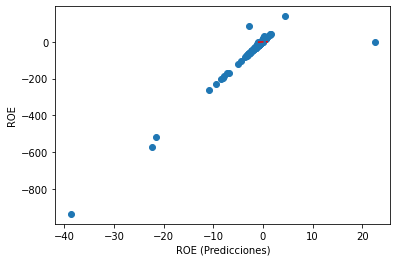


 Prediccion año 2020 datos:
MAE: 1.0072892904281616
MSE: 128.7194061279297
RMSE: 11.345457077026367


In [305]:
# Evaluando el modelo
y_pred = []
y_true = []
modelo.train(False)
for inputs, targets in train_loader:
 y_pred.extend(modelo(inputs).data.numpy())
 y_true.extend(targets.numpy())
plt.scatter(y_pred, y_true)
plt.ylabel('ROE')
plt.xlabel('ROE (Predicciones)')
plt.plot([-1,1], [-1, 1], '--k', c='r')
plt.show()
# Calculando Errores
mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
print(f"\n Prediccion año 2020 datos:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


**EVALUANDO MODELO 2017**

In [288]:
datos_2017.fillna(0)
datos_2017.dropna(inplace=True)
datos_2017

,AÑO,EXPEDIENTE,NOMBRE,RAMA,DESCRIPCIÓN RAMA,RAMA 6 DÍGITOS,SUBRAMA 2 DÍGITOS,LIQUIDEZ CORRIENTE,PRUEBA ÁCIDA,ENDEUDAMIENTO DEL ACTIVO,...,IMPACTO DE LA CARGA FINANCIERA,RENTABILIDAD NETA DEL ACTIVO,MARGEN BRUTO,MARGEN OPERACIONAL,RENTABILIDAD NETA DE VENTAS,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABLIDAD FINANCIERA,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,ROE,ROA
1,2017,2,ACERIA DEL ECUADOR CA ADELCA.,C,INDUSTRIAS MANUFACTURERAS.,C2410.25,C24,2.120023,0.919578,0.569611,...,0.029892,0.022234,0.441330,0.323841,0.033594,0.498000,0.051660,0.214334,0.051660,0.022234
2,2017,3,ACERO COMERCIAL ECUATORIANO S.A.,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4659.99,G46,5.005716,1.729465,0.683460,...,0.014632,-0.041947,0.294359,-0.076245,-0.048179,-0.209714,-0.132518,-0.066383,-0.132518,-0.041947
4,2017,22,AGENCIAS Y REPRESENTACIONES CORDOVEZ SA,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4630.95,G46,1.893049,1.505343,0.539869,...,0.012966,0.023904,0.087431,0.030094,0.019117,0.081783,0.051951,0.037631,0.051951,0.023904
7,2017,49,ALMACENES EL GLOBO DE QUITO SA,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4719.00,G47,1.444526,0.280351,0.757803,...,0.001009,-0.017117,0.349337,-0.021600,-0.022563,-0.067657,-0.070674,-0.016386,-0.070674,-0.017117
8,2017,63,CONFITECA C.A.,C,INDUSTRIAS MANUFACTURERAS.,C1073.21,C10,1.583741,1.117378,0.517518,...,0.013982,0.049939,0.714378,0.356378,0.044120,0.836048,0.103504,0.403378,0.103504,0.049939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80431,2017,714930,CAMARONERA MARCRESCI MARCRESCISA S.A.,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0321.02,A03,1.558332,1.127656,0.954422,...,0.002111,0.027108,2.587700,2.324555,0.474420,2.914201,0.594761,0.132824,0.594761,0.027108
80447,2017,714947,COMERCIALIZADORA Y CONSERVADORA DE PESCADO BUS...,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0311.01,A03,1.205692,1.205692,0.787956,...,0.000289,0.140243,0.471945,0.433456,0.039151,7.322510,0.661388,1.552694,0.661388,0.140243
80460,2017,714960,METALAUSTROFERRETERIA CIA.LTDA.,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4610.05,G46,0.410190,0.360961,0.985465,...,0.000622,0.008966,0.207624,0.089137,0.018555,2.963139,0.616829,0.043069,0.616829,0.008966
80679,2017,715220,REYLACTEOS C.L.,C,INDUSTRIAS MANUFACTURERAS.,C1050.01,C10,2.968505,2.072843,0.252700,...,0.019116,0.000318,0.553455,0.322272,0.005506,0.024870,0.000425,0.018585,0.000425,0.000318


In [289]:
dfs_rg_l = datos_2020[['ROE','RENTABILIDAD OPERACIONAL DEL PATRIMONIO', 'RENTABILIDAD NETA DE VENTAS']]
#Remover Outliers

dfs_rg_l

,ROE,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABILIDAD NETA DE VENTAS
0,0.017822,0.079047,0.145618
2,-0.080518,-0.120850,-0.034202
4,0.093772,0.167538,0.033429
7,-0.985009,-0.901599,-0.217195
8,-0.057209,0.319549,-0.044041
...,...,...,...
83769,0.090264,-6.274013,0.012410
83825,-0.341922,0.310856,-0.036434
83830,0.899413,0.901391,0.326974
83880,-1.014521,-0.762914,-51.375614


In [290]:
dfs_Y = dfs_rg_l[['ROE']]
dfs_Y

,ROE
0,0.017822
2,-0.080518
4,0.093772
7,-0.985009
8,-0.057209
...,...
83769,0.090264
83825,-0.341922
83830,0.899413
83880,-1.014521


In [291]:
dfs_X = dfs_rg_l[['ROE','RENTABILIDAD OPERACIONAL DEL PATRIMONIO', 'RENTABILIDAD NETA DE VENTAS']]
dfs_X

,ROE,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABILIDAD NETA DE VENTAS
0,0.017822,0.079047,0.145618
2,-0.080518,-0.120850,-0.034202
4,0.093772,0.167538,0.033429
7,-0.985009,-0.901599,-0.217195
8,-0.057209,0.319549,-0.044041
...,...,...,...
83769,0.090264,-6.274013,0.012410
83825,-0.341922,0.310856,-0.036434
83830,0.899413,0.901391,0.326974
83880,-1.014521,-0.762914,-51.375614


In [292]:
scaler = StandardScaler()
inputs = scaler.fit_transform(dfs_X)
dX = np.array(inputs, dtype='float32')
dY = np.array(dfs_Y, dtype='float32')

In [293]:
dX

array([[ 0.04036301, -0.03196327,  0.0089452 ],
       [ 0.03204108, -0.03560445,  0.00878947],
       [ 0.04679025, -0.03035139,  0.00884804],
       ...,
       [ 0.11496707, -0.01698408,  0.00910226],
       [-0.04699835, -0.0472998 , -0.03567374],
       [ 0.08404137,  0.87546974,  0.00882611]], dtype=float32)

In [294]:
dY

array([[ 0.01782197],
       [-0.08051773],
       [ 0.09377224],
       ...,
       [ 0.8994128 ],
       [-1.014521  ],
       [ 0.53396606]], dtype=float32)

In [295]:
print('tamaño de dX INDICADORES : ',dX.shape) #tamaño de dX INDICADORES
print('tamaño de dY ROE : ',dY.shape) #tamaño de dY ROE

tamaño de dX INDICADORES :  (14020, 3)
tamaño de dY ROE :  (14020, 1)


In [296]:
X = torch.from_numpy(dX)
Y = torch.from_numpy(dY)

In [297]:
from torch.utils.data import TensorDataset
dataset = TensorDataset(X,Y)

In [298]:
dataset[1:2]

(tensor([[ 0.0320, -0.0356,  0.0088]]), tensor([[-0.0805]]))

In [299]:
from torch.utils.data import DataLoader
bs=64
train_loader = DataLoader(dataset,batch_size=bs,shuffle=True)

In [300]:
class ModeloRegresionLineal(torch.nn.Module):
 def __init__(self):
  super(ModeloRegresionLineal, self).__init__()
  self.linear = torch.nn.Linear(3,1) #X @ w.t() + b
 def forward(self, x):
  y_pred = self.linear(x)
  return y_pred

In [301]:
epochs = 30
ta = 1e-9 # Tasa Aprendizaje
modelo = ModeloRegresionLineal()
funcion_costo = torch.nn.MSELoss(reduction = 'mean')
optimizer = torch.optim.SGD(modelo.parameters(), lr = ta) #Actualiza los pesos w y el bias b

for i in range(epochs):
  for x,y in train_loader:
   preds = modelo(x)
   loss = funcion_costo(preds, y)
   optimizer.zero_grad()
   loss.backward()
   optimizer.step()

  print(f"Epoch {i}/{epochs}: Loss {loss}")

Epoch 0/30: Loss 0.2329263538122177
Epoch 1/30: Loss 0.34837332367897034
Epoch 2/30: Loss 0.2433815449476242
Epoch 3/30: Loss 0.05776943266391754
Epoch 4/30: Loss 0.16537369787693024
Epoch 5/30: Loss 0.7609979510307312
Epoch 6/30: Loss 0.10551682114601135
Epoch 7/30: Loss 0.12570995092391968
Epoch 8/30: Loss 0.08270823210477829
Epoch 9/30: Loss 0.4433460533618927
Epoch 10/30: Loss 19.59803009033203
Epoch 11/30: Loss 0.11380017548799515
Epoch 12/30: Loss 0.2834673523902893
Epoch 13/30: Loss 0.08755698800086975
Epoch 14/30: Loss 0.11523362994194031
Epoch 15/30: Loss 0.19123423099517822
Epoch 16/30: Loss 0.5826622247695923
Epoch 17/30: Loss 0.9881596565246582
Epoch 18/30: Loss 0.24328851699829102
Epoch 19/30: Loss 0.8955906629562378
Epoch 20/30: Loss 73.48155212402344
Epoch 21/30: Loss 0.03496107831597328
Epoch 22/30: Loss 0.09457211196422577
Epoch 23/30: Loss 0.36414679884910583
Epoch 24/30: Loss 0.06265504658222198
Epoch 25/30: Loss 1.380377173423767
Epoch 26/30: Loss 0.2700571119785309

In [302]:
modelo.linear.weight #w

Parameter containing:
tensor([[ 0.4892, -0.0573, -0.1931]], requires_grad=True)

In [303]:
modelo.linear.bias #b

Parameter containing:
tensor([-0.2467], requires_grad=True)

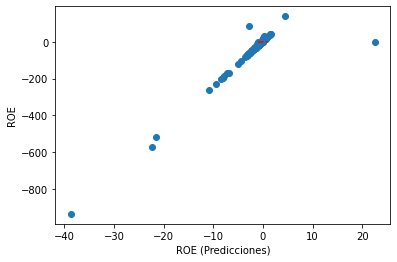


Resultados Del año 2017 datos:
MAE: 1.0072892904281616
MSE: 128.7194061279297
RMSE: 11.345457077026367


In [306]:
# Evaluando el modelo
y_pred = []
y_true = []
modelo.train(False)
for inputs, targets in train_loader:
 y_pred.extend(modelo(inputs).data.numpy())
 y_true.extend(targets.numpy())
plt.scatter(y_pred, y_true)
plt.ylabel('ROE')
plt.xlabel('ROE (Predicciones)')
plt.plot([-1,1], [-1, 1], '--k', c='r')
plt.show()
# Calculando Errores
mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
print(f"\nResultados Del año 2017 datos:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


**EVALUANDO MODELO 2018**

In [307]:
datos_2018.fillna(0)
datos_2018.dropna(inplace=True)
datos_2018

,AÑO,EXPEDIENTE,NOMBRE,RAMA,DESCRIPCIÓN RAMA,RAMA 6 DÍGITOS,SUBRAMA 2 DÍGITOS,LIQUIDEZ CORRIENTE,PRUEBA ÁCIDA,ENDEUDAMIENTO DEL ACTIVO,...,IMPACTO DE LA CARGA FINANCIERA,RENTABILIDAD NETA DEL ACTIVO,MARGEN BRUTO,MARGEN OPERACIONAL,RENTABILIDAD NETA DE VENTAS,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABLIDAD FINANCIERA,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,ROE,ROA
1,2018,2,ACERIA DEL ECUADOR CA ADELCA.,C,INDUSTRIAS MANUFACTURERAS.,C2410.25,C24,1.585869,0.511591,0.581168,...,0.036554,0.010637,0.386019,0.284260,0.015210,0.474657,0.025397,0.198801,0.025397,0.010637
2,2018,3,ACERO COMERCIAL ECUATORIANO S.A.,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4659.99,G46,3.087529,1.179696,0.675583,...,0.009386,0.017400,0.296238,0.003423,0.015702,0.011693,0.053634,0.003793,0.053634,0.017400
4,2018,22,AGENCIAS Y REPRESENTACIONES CORDOVEZ SA,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4630.95,G46,1.465639,1.028945,0.693559,...,0.009986,0.036054,0.111956,0.057261,0.031289,0.215313,0.117653,0.065981,0.117653,0.036054
7,2018,49,ALMACENES EL GLOBO DE QUITO SA,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4719.00,G47,1.445758,0.380729,0.758404,...,0.000668,-0.004738,0.374076,-0.023059,-0.006867,-0.065857,-0.019613,-0.015911,-0.019613,-0.004738
8,2018,63,CONFITECA C.A.,C,INDUSTRIAS MANUFACTURERAS.,C1073.21,C10,1.763910,1.268818,0.511668,...,0.016797,0.051352,0.713660,0.354998,0.043362,0.860920,0.105158,0.420415,0.105158,0.051352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83339,2018,720498,OPENAUDIO S.A.,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4759.06,G47,0.739370,0.506550,0.977542,...,0.020748,0.000000,0.482540,-1.142714,0.000000,-0.855750,0.000000,-0.019218,0.000000,0.000000
83409,2018,720576,BRADFORD GRILL BRADFORDGRILL S.A.,I,ACTIVIDADES DE ALOJAMIENTO Y DE SERVICIO DE CO...,I5610.02,I56,0.296868,0.296868,0.954041,...,0.010139,-0.064824,0.429894,0.019658,-0.051439,0.539024,-1.410475,0.024773,-1.410475,-0.064824
83475,2018,720653,BUSINESS GENERATION BUSSGEN S.A.,I,ACTIVIDADES DE ALOJAMIENTO Y DE SERVICIO DE CO...,I5610.01,I56,3.114071,2.405489,1.000577,...,0.007184,-0.008580,0.555358,0.002423,-0.039196,0.919369,-14.872031,0.000530,-14.872030,-0.008580
83745,2018,720948,EMRIECAR S.A.,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4530.00,G45,1.111265,0.714343,0.889490,...,0.000247,0.066121,0.222060,0.145189,0.144942,0.599344,0.598323,0.066234,0.598323,0.066121


In [308]:
dfs_rg_l = datos_2020[['ROE','RENTABILIDAD OPERACIONAL DEL PATRIMONIO', 'RENTABILIDAD NETA DE VENTAS']]
#Remover Outliers

dfs_rg_l

,ROE,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABILIDAD NETA DE VENTAS
0,0.017822,0.079047,0.145618
2,-0.080518,-0.120850,-0.034202
4,0.093772,0.167538,0.033429
7,-0.985009,-0.901599,-0.217195
8,-0.057209,0.319549,-0.044041
...,...,...,...
83769,0.090264,-6.274013,0.012410
83825,-0.341922,0.310856,-0.036434
83830,0.899413,0.901391,0.326974
83880,-1.014521,-0.762914,-51.375614


In [309]:
dfs_Y = dfs_rg_l[['ROE']]
dfs_Y

,ROE
0,0.017822
2,-0.080518
4,0.093772
7,-0.985009
8,-0.057209
...,...
83769,0.090264
83825,-0.341922
83830,0.899413
83880,-1.014521


In [310]:
dfs_X = dfs_rg_l[['ROE','RENTABILIDAD OPERACIONAL DEL PATRIMONIO', 'RENTABILIDAD NETA DE VENTAS']]
dfs_X

,ROE,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABILIDAD NETA DE VENTAS
0,0.017822,0.079047,0.145618
2,-0.080518,-0.120850,-0.034202
4,0.093772,0.167538,0.033429
7,-0.985009,-0.901599,-0.217195
8,-0.057209,0.319549,-0.044041
...,...,...,...
83769,0.090264,-6.274013,0.012410
83825,-0.341922,0.310856,-0.036434
83830,0.899413,0.901391,0.326974
83880,-1.014521,-0.762914,-51.375614


In [311]:
scaler = StandardScaler()
inputs = scaler.fit_transform(dfs_X)
dX = np.array(inputs, dtype='float32')
dY = np.array(dfs_Y, dtype='float32')

In [312]:
dX

array([[ 0.04036301, -0.03196327,  0.0089452 ],
       [ 0.03204108, -0.03560445,  0.00878947],
       [ 0.04679025, -0.03035139,  0.00884804],
       ...,
       [ 0.11496707, -0.01698408,  0.00910226],
       [-0.04699835, -0.0472998 , -0.03567374],
       [ 0.08404137,  0.87546974,  0.00882611]], dtype=float32)

In [313]:
dY

array([[ 0.01782197],
       [-0.08051773],
       [ 0.09377224],
       ...,
       [ 0.8994128 ],
       [-1.014521  ],
       [ 0.53396606]], dtype=float32)

In [314]:
print('tamaño de dX INDICADORES : ',dX.shape) #tamaño de dX INDICADORES
print('tamaño de dY ROE : ',dY.shape) #tamaño de dY ROE

tamaño de dX INDICADORES :  (14020, 3)
tamaño de dY ROE :  (14020, 1)


In [315]:
X = torch.from_numpy(dX)
Y = torch.from_numpy(dY)

In [316]:
from torch.utils.data import TensorDataset
dataset = TensorDataset(X,Y)

In [317]:
dataset[1:2]

(tensor([[ 0.0320, -0.0356,  0.0088]]), tensor([[-0.0805]]))

In [318]:
from torch.utils.data import DataLoader
bs=64
train_loader = DataLoader(dataset,batch_size=bs,shuffle=True)

In [319]:
class ModeloRegresionLineal(torch.nn.Module):
 def __init__(self):
  super(ModeloRegresionLineal, self).__init__()
  self.linear = torch.nn.Linear(3,1) #X @ w.t() + b
 def forward(self, x):
  y_pred = self.linear(x)
  return y_pred

In [320]:
epochs = 30
ta = 1e-9 # Tasa Aprendizaje
modelo = ModeloRegresionLineal()
funcion_costo = torch.nn.MSELoss(reduction = 'mean')
optimizer = torch.optim.SGD(modelo.parameters(), lr = ta) #Actualiza los pesos w y el bias b

for i in range(epochs):
  for x,y in train_loader:
   preds = modelo(x)
   loss = funcion_costo(preds, y)
   optimizer.zero_grad()
   loss.backward()
   optimizer.step()

  print(f"Epoch {i}/{epochs}: Loss {loss}")

Epoch 0/30: Loss 0.03816503658890724
Epoch 1/30: Loss 0.028957800939679146
Epoch 2/30: Loss 15.449923515319824
Epoch 3/30: Loss 2.0858418941497803
Epoch 4/30: Loss 7.917113780975342
Epoch 5/30: Loss 0.012297725304961205
Epoch 6/30: Loss 1.0257222652435303
Epoch 7/30: Loss 0.009770125150680542
Epoch 8/30: Loss 7.122675895690918
Epoch 9/30: Loss 0.22992557287216187
Epoch 10/30: Loss 22.455156326293945
Epoch 11/30: Loss 2.2673659324645996
Epoch 12/30: Loss 0.7916465997695923
Epoch 13/30: Loss 3.1368720531463623
Epoch 14/30: Loss 0.010750258341431618
Epoch 15/30: Loss 0.2509259879589081
Epoch 16/30: Loss 0.052849724888801575
Epoch 17/30: Loss 0.13255004584789276
Epoch 18/30: Loss 0.004006273113191128
Epoch 19/30: Loss 0.12529690563678741
Epoch 20/30: Loss 0.2967700660228729
Epoch 21/30: Loss 0.1448555439710617
Epoch 22/30: Loss 0.23854151368141174
Epoch 23/30: Loss 0.03809897601604462
Epoch 24/30: Loss 0.08151651173830032
Epoch 25/30: Loss 0.31255555152893066
Epoch 26/30: Loss 0.0346338190

In [321]:
modelo.linear.weight #w

Parameter containing:
tensor([[ 0.3152, -0.0519, -0.2671]], requires_grad=True)

In [322]:
modelo.linear.bias #b

Parameter containing:
tensor([-0.0733], requires_grad=True)

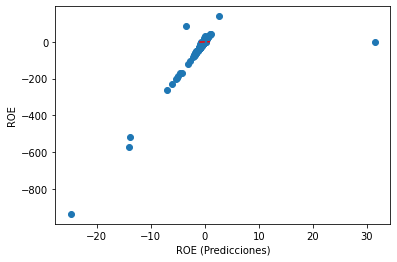


Resultados Del año 2017 datos:
MAE: 0.916106104850769
MSE: 132.8055419921875
RMSE: 11.524128913879395


In [323]:
# Evaluando el modelo
y_pred = []
y_true = []
modelo.train(False)
for inputs, targets in train_loader:
 y_pred.extend(modelo(inputs).data.numpy())
 y_true.extend(targets.numpy())
plt.scatter(y_pred, y_true)
plt.ylabel('ROE')
plt.xlabel('ROE (Predicciones)')
plt.plot([-1,1], [-1, 1], '--k', c='r')
plt.show()
# Calculando Errores
mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
print(f"\nResultados Del año 2017 datos:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


**CONCLUSION**

Segun los datos analizados podemos detectar que el año en el que mejor predice es el año del 2017  ya que nos da un error bien bajo por lo cual se estima que la precision fue casi exacta


Mientras que por otro lado el año en que la prediccion estuvo fuera de control fue en el año del 2019 ya que nos arrojo un error muy alto